## 1. Using the API

Recall the **big picture**. If we are targeting for specific data we could check if the web site has a programatic interface for querying. If it has we can use it.



<img style="border-radius:20px;" src="./files/big_picture.jpg">

## Scrapping twitter data with the API

A standard way for programatically communicating with a web service is using the API (Application Programing Interface) whenever it is provided. Twitter provides several APIs. The two most important ones are the RESTful API for static queries (e.g. user's friends and followers, check timelines, etc) and the Streaming API for retrieving live data. The REST API identifies Twitter applications and users using OAuth; responses are available in JSON. The Streaming API should not need authentication.

Ex. 

https://api.twitter.com/oauth/authenticate?oauth_token=XXXXXXXXXXXXXX

https://api.twitter.com/1.1/followers/ids.json?cursor=-1&screen_name=my_user_name&count=5000

Building these queries is not always easy, thus we may use a wrapper around the API. This is what **tweepy** does.

Using the API with authentification (needed for the RESTful API)

From wikipedia:

>"Web service APIs that adhere to the architectural constraints are called RESTful. HTTP based RESTful APIs are defined with these aspects:

> <ul><li>base URI, such as http://example.com/resources/
<li>an Internet media type for the data. This is often JSON but can be any other valid Internet media type (e.g. XML, Atom, microformats, images, etc.)</li>
<li>standard HTTP methods (e.g., GET, PUT, POST, or DELETE)</li>
<li>hypertext links to reference state</li>
<li>hypertext links to reference related resources"</li>
</ul>

If we want to use the RESTful API in Twitter we have to follow these steps:
<ul>
<li>From your twitter account we want to generate a token: https://developer.twitter.com/en/apps</li>
<li>Create a new App. This will create the API keys (consumer keys)</li>
<li>Go to API Keys and generate a token. (access keys)</li>
<li> Write them down in files **consumer_key**, **consumer_secret**, **access_key**, **access_secret**
<li> Check Tweepy API reference: http://docs.tweepy.org/en/v3.5.0/api.html
</ul>

`pip install tweepy`

In [3]:

import json
import pymongo
import tweepy

with open('consumer_key', 'r') as f:
    consumer_key =  f.read()
f.closed

with open('consumer_secret', 'r') as f:
    consumer_secret = f.read()
f.closed

with open('access_key', 'r') as f:
    access_key = f.read()
f.closed

with open('access_secret', 'r') as f:
     access_secret = f.read()
f.closed


#Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)


#Do something
USER_NAME = "eloipuertas"
user = api.get_user(id=USER_NAME)
print (user)

Unexpected parameter: id


User(_api=<tweepy.api.API object at 0x10900a0a0>, _json={'id': 484683149, 'id_str': '484683149', 'name': 'Eloi Puertas Prats', 'screen_name': 'eloipuertas', 'location': 'Univeristat de Barcelona', 'profile_location': None, 'description': 'Distributed Software and Agile Data Science teacher. Director of Studies Eng. Informàtica. UB. DatabeersBCN co-founder.', 'url': 'https://t.co/hbfA0tesFa', 'entities': {'url': {'urls': [{'url': 'https://t.co/hbfA0tesFa', 'expanded_url': 'http://ub-gei-sd.github.io/', 'display_url': 'ub-gei-sd.github.io', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 708, 'friends_count': 552, 'listed_count': 186, 'created_at': 'Mon Feb 06 11:23:33 +0000 2012', 'favourites_count': 6488, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 6787, 'lang': None, 'status': {'created_at': 'Thu May 06 20:04:10 +0000 2021', 'id': 1390396995643318278, 'id_str': '1390396995643318278', 'text

We can access some basic information about the user

In [6]:
user.screen_name

'eloipuertas'

In [7]:
user.id

484683149

In [8]:
user.created_at

datetime.datetime(2012, 2, 6, 11, 23, 33, tzinfo=datetime.timezone.utc)

In [9]:
user.friends_count

552

In [10]:
user.followers_count

708

In [12]:
timeline = api.user_timeline(count=5)
#Retrieve a Status object...

for status in timeline:
    print (status.text+ "\n")

RT @AAC_GD: Mañana empieza el #ArchivalDatathon  y durará hasta el 13 de mayo... la inscripción hasta el lunes, no te despistes.
Aquí te de…

RT @AAC_GD: El Datathon Arxiver serà una realitat al Congrés! Un repte de classificació automàtica, convideu a científics de dades, matemàt…

@el_pais qui ha escrit el titular és un analfabet funcional

@ch_doig T'acompanyo en el sentiment. Una forta abraçada

RT @submariblau: Una edició més (la meva 16a!) participant al #CampusItaca @UABBarcelona amb taller #Robots ; content d contribuir a motiva…



>JSON (JavaScript Object Notation), is an open standard format that uses human-readable text to transmit data objects consisting of attribute–value pairs. It is used primarily to transmit data between a server and web application, as an alternative to XML. JSON is a way to encode complicated information in a platform-independent way.  It could be considered the lingua franca of information exchange on the Internet. 

In [14]:
#We can access the full JSON
user._json

{'id': 484683149,
 'id_str': '484683149',
 'name': 'Eloi Puertas Prats',
 'screen_name': 'eloipuertas',
 'location': 'Univeristat de Barcelona',
 'profile_location': None,
 'description': 'Distributed Software and Agile Data Science teacher. Director of Studies Eng. Informàtica. UB. DatabeersBCN co-founder.',
 'url': 'https://t.co/hbfA0tesFa',
 'entities': {'url': {'urls': [{'url': 'https://t.co/hbfA0tesFa',
     'expanded_url': 'http://ub-gei-sd.github.io/',
     'display_url': 'ub-gei-sd.github.io',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 708,
 'friends_count': 552,
 'listed_count': 186,
 'created_at': 'Mon Feb 06 11:23:33 +0000 2012',
 'favourites_count': 6488,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 6787,
 'lang': None,
 'status': {'created_at': 'Thu May 06 20:04:10 +0000 2021',
  'id': 1390396995643318278,
  'id_str': '1390396995643318278',
  'text': 'RT @AAC_

We can access all the information as it was a dictionary structure.

In [15]:
juser = user._json
print (juser['created_at'])

Mon Feb 06 11:23:33 +0000 2012


We can apply our basic scrape knowledge and use urllib to retrieve more interesting infomation, such as the profile image.

In [16]:
img_url = juser['profile_image_url']
print (img_url)

http://pbs.twimg.com/profile_images/1808176110/eloi_normal.jpg


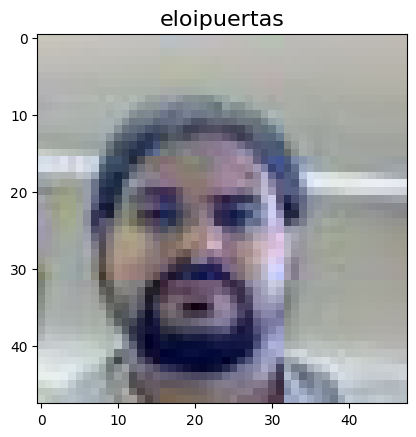

In [17]:
import urllib
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open(urllib.request.urlopen(img_url))
plt.title(juser['screen_name'],size=16)
plt.imshow(im)

Now we want to retrieve the list of follower ids. There are two ways for doing so. Both uses the `api.followers_ids` function. The function returns a maximum of 100 ids. If we want to get all of them we may use a pagination variable `cursor`. This can be managed directly in the call `api.followers_ids(id, cursor)` or using a `Cursor` object with the `pages` method that handles the cursor implicitly. This second method is illustrated in the following lines:

In [27]:
import time
#Retrieving all the followers
ids = []
for page in tweepy.Cursor(api.get_follower_ids, screen_name=USER_NAME).pages():
    print("************** ***************")
    ids.extend(page)
    time.sleep(5)  #This should be 60 to avoid limit rates
ids

************** ***************


[407345494,
 231414432,
 152169542,
 777828647617064960,
 225506157,
 1417115135034990592,
 245123953,
 118633974,
 41709942,
 412080995,
 839845274,
 118523988,
 6965262,
 271858089,
 971708636866187264,
 376093310,
 1181131341687066624,
 439154242,
 249701367,
 1283444700620435456,
 1024927154033840128,
 1192815153710075905,
 787237935431155712,
 1313947634894278657,
 1297906552624549889,
 264782467,
 920558494834741250,
 1086000334617669632,
 3430665604,
 1286348081043320832,
 49830518,
 1267815081930141697,
 229638140,
 2501180688,
 116408890,
 1271379770790629376,
 1260585781611069441,
 1039402716,
 271565810,
 1227550867651485696,
 3246632776,
 1864743421,
 1222811636525948933,
 814790600805548036,
 1188736762740379648,
 817500956,
 3272390118,
 1178575756273881088,
 943117624099135488,
 477902283,
 112501287,
 1178796437477511168,
 212308422,
 2440604360,
 937592982,
 19435796,
 702214973792063489,
 1151306876530962432,
 454143009,
 1146167902640451587,
 1426409264,
 373280522,


Notice the `sleep` command. This is needed to respect the hourly limit rates of the Twitter API. 

In [33]:
document={}
document['user'] = user.id
document['followers'] = ids[:]

# Create the connection to MongoDB on the cloud
try:
        with open("credentials.txt", 'r', encoding='utf-8') as f:
                [name,password,url]=f.read().splitlines()
                
                conn=pymongo.MongoClient("mongodb+srv://{}:{}@{}".format(name,password,url))
        print ("Connected successfully!!!")
except pymongo.errors.ConnectionFailure as e:
     print ("Could not connect to MongoDB: %s" % e) 

db = conn['twitter']
collection = db['twitter_users']
collection.insert_one(document)

Connected successfully!!!


In [34]:
for doc in collection.find():
    print (doc)

{'_id': ObjectId('615460576cf1983ec480ffad'), 'user': 484683149, 'followers': [407345494, 231414432, 152169542, 777828647617064960, 225506157, 1417115135034990592, 245123953, 118633974, 41709942, 412080995, 839845274, 118523988, 6965262, 271858089, 971708636866187264, 376093310, 1181131341687066624, 439154242, 249701367, 1283444700620435456, 1024927154033840128, 1192815153710075905, 787237935431155712, 1313947634894278657, 1297906552624549889, 264782467, 920558494834741250, 1086000334617669632, 3430665604, 1286348081043320832, 49830518, 1267815081930141697, 229638140, 2501180688, 116408890, 1271379770790629376, 1260585781611069441, 1039402716, 271565810, 1227550867651485696, 3246632776, 1864743421, 1222811636525948933, 814790600805548036, 1188736762740379648, 817500956, 3272390118, 1178575756273881088, 943117624099135488, 477902283, 112501287, 1178796437477511168, 212308422, 2440604360, 937592982, 19435796, 702214973792063489, 1151306876530962432, 454143009, 1146167902640451587, 142640

In [35]:
doc['user']

484683149

In [36]:
doc['followers']

[407345494,
 231414432,
 152169542,
 777828647617064960,
 225506157,
 1417115135034990592,
 245123953,
 118633974,
 41709942,
 412080995,
 839845274,
 118523988,
 6965262,
 271858089,
 971708636866187264,
 376093310,
 1181131341687066624,
 439154242,
 249701367,
 1283444700620435456,
 1024927154033840128,
 1192815153710075905,
 787237935431155712,
 1313947634894278657,
 1297906552624549889,
 264782467,
 920558494834741250,
 1086000334617669632,
 3430665604,
 1286348081043320832,
 49830518,
 1267815081930141697,
 229638140,
 2501180688,
 116408890,
 1271379770790629376,
 1260585781611069441,
 1039402716,
 271565810,
 1227550867651485696,
 3246632776,
 1864743421,
 1222811636525948933,
 814790600805548036,
 1188736762740379648,
 817500956,
 3272390118,
 1178575756273881088,
 943117624099135488,
 477902283,
 112501287,
 1178796437477511168,
 212308422,
 2440604360,
 937592982,
 19435796,
 702214973792063489,
 1151306876530962432,
 454143009,
 1146167902640451587,
 1426409264,
 373280522,


### Sreaming API

The **Streaming API** works by making a request for a specific type of data — filtered by keyword, user, geographic area, or a random sample — and then keeping the connection open as long as there are no errors in the connection. The data you get back will be encoded in JSON. 

One of the main usage cases of tweepy is monitoring for tweets and doing actions when some event happens. Key component of that is the StreamListener object, which monitors tweets in real time and catches them.

If we check the official twitter streaming API we see that we have several modifiers for filtering the stream, i.e. track (filter by keyword), locations (filter by geographic location), etc

StreamListener has several methods, with on_data() and on_status() being the most useful ones. Here is a sample program which implements this behavior:

In [18]:
from tweepy import Stream

class customStream(Stream):
    
    def __init__(self,consumer_key,consumer_secret,access_key,access_secret):
        super().__init__(consumer_key,consumer_secret,access_key,access_secret)
        self.num_tweets = 0
    def on_data(self, data):
        parsed = json.loads(data)
        print (json.dumps(parsed, indent=4, sort_keys=True))
        self.num_tweets += 1
        if self.num_tweets >= 5:
            raise tweepy.TweepyException("Done")

    def on_exception(self, status):
        print (status)

1. Get the twitter data filtered by location inside the following bounding box. (http://boundingbox.klokantech.com) (get CSV)

[2.0878744125,41.465321939,2.0950841904,41.4704350021]

In [19]:
twitterStream = customStream(consumer_key,consumer_secret,access_key,access_secret) 
twitterStream.filter(locations=[2.067704,41.465322,2.095084,41.478474])

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Sep 30 08:50:36 +0000 2021",
    "display_text_range": [
        12,
        76
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [],
        "user_mentions": [
            {
                "id": 1371881499444850690,
                "id_str": "1371881499444850690",
                "indices": [
                    0,
                    11
                ],
                "name": "yuki",
                "screen_name": "yuki_evaaa"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "filter_level": "low",
    "geo": null,
    "id": 1443498500927508482,
    "id_str": "1443498500927508482",
    "in_reply_to_screen_name": "yuki_evaaa",
    "in_reply_to_status_id": 1443493302234488832,
    "in_reply_to_status_id_str": "1443493302234488832",
    "in_reply_to_user_id": 1371881499444850690,
    "in_reply_to_user_id_str": "1371881499444850690",
    

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Sep 30 08:51:08 +0000 2021",
    "display_text_range": [
        0,
        54
    ],
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/4IcozvWNLQ",
                "expanded_url": "https://twitter.com/VdfVdf43685369/status/1443498634528665602/photo/1",
                "id": 1443498625930256389,
                "id_str": "1443498625930256389",
                "indices": [
                    55,
                    78
                ],
                "media_url": "http://pbs.twimg.com/media/FAhWWjBWYAUO_QR.jpg",
                "media_url_https": "https://pbs.twimg.com/media/FAhWWjBWYAUO_QR.jpg",
                "sizes": {
                    "large": {
                        "h": 675,
                        "resize": "fit",
                        "w": 1200
                    },
                    "medium": {
                       

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Sep 30 08:51:15 +0000 2021",
    "display_text_range": [
        0,
        0
    ],
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/dpW8Q5yutW",
                "expanded_url": "https://twitter.com/antinouslibros/status/1443498664228425734/photo/1",
                "id": 1443498648680161283,
                "id_str": "1443498648680161283",
                "indices": [
                    0,
                    23
                ],
                "media_url": "http://pbs.twimg.com/media/FAhWX3xWYAMYUkS.jpg",
                "media_url_https": "https://pbs.twimg.com/media/FAhWX3xWYAMYUkS.jpg",
                "sizes": {
                    "large": {
                        "h": 1463,
                        "resize": "fit",
                        "w": 1600
                    },
                    "medium": {
                        

In [16]:
from tweepy import Stream

class customStream(Stream):
    
    def __init__(self,consumer_key,consumer_secret,access_key,access_secret):
        super().__init__(consumer_key,consumer_secret,access_key,access_secret)
        self.num_tweets = 0
   
        
    def on_data(self, status):
        
        json_data=json.loads(status)
        print (str('** '+json_data["user"]["screen_name"])+' ** : ' + json_data["text"])
        self.num_tweets += 1
        if self.num_tweets >= 5:
            raise tweepy.TweepyException("Done")
        
        
    def on_exception(self, status):
        print (status)
        
# Catch all tweets in Barcelona area and print them
twitterStream = customStream(consumer_key,consumer_secret,access_key,access_secret) 
twitterStream.filter(locations=[2.0504377635,41.2787636541,2.3045074059,41.4725622346])

** VdfVdf43685369 ** : Ese equipo grande si se puede https://t.co/Ig9wDoGDaH
** CukorMC ** : @asierbijoux Jo si
** xabier_alonso_ ** : “La pregunta ya no es si el cannabis tendrá una regulación o no, la pregunta es cómo y cuándo.”

Excelente explicac… https://t.co/7KA4Bo9wHR
** abdallah_rm11 ** : The greatest of all time. https://t.co/GeR0rnzNRl
** VdfVdf43685369 ** : https://t.co/kZ9Rf1u8Zb
Done
done


Let us fill the class in order to capture and store the data in a MongoDB database.

In [23]:
from tweepy import Stream

class customStream(Stream):
    def __init__(self,consumer_key,consumer_secret,access_key,access_secret):
        super().__init__(consumer_key,consumer_secret,access_key,access_secret)
        self.num_tweets = 0
        try:
            with open("credentials.txt", 'r', encoding='utf-8') as f:
                [name,password,url]=f.read().splitlines()
                self.conn=pymongo.MongoClient("mongodb+srv://{}:{}@{}".format(name,password,url,))
            print ("Connected successfully!!!")
        except pymongo.errors.ConnectionFailure as e:
            print ("Could not connect to MongoDB: %s" % e) 
        self.db = self.conn['API']
        self.collection = self.db['tweets']
    
    def on_data(self, status):
        
        jdata = json.loads(status)
        if 'android' in jdata["source"]:
                device = "android"
        else:
                device = "apple"
        document={'text':jdata["text"], 'created':jdata["created_at"], 'screen_name':jdata["user"]["screen_name"], 'device':device}        
        self.collection.insert_one(document) 
        print (document)
        self.num_tweets += 1
        if self.num_tweets >= 5:
            raise tweepy.TweepyException("Done")
        
        
    def on_exception(self, status):
        print (status)

# Catch all tweets in Barcelona area and print them
twitterStream = customStream(consumer_key,consumer_secret,access_key,access_secret) 
twitterStream.filter(locations=[2.0504377635,41.2787636541,2.3045074059,41.4725622346])

Connected successfully!!!
{'text': 'Es un bb💙🤧 https://t.co/S6WM3JIm3h', 'created': 'Thu Sep 30 08:56:16 +0000 2021', 'screen_name': 'julia23orri', 'device': 'apple', '_id': ObjectId('61557bb597aa873c880b364d')}
{'text': '@jmangues El cielo puede esperar', 'created': 'Thu Sep 30 08:56:17 +0000 2021', 'screen_name': 'tancatibarrat', 'device': 'android', '_id': ObjectId('61557bb697aa873c880b364e')}
{'text': '@KRLS AVUI ESTIMAT PRESIDENT TENIM TRACA CONTRA EL REI A LA PLAÇA ESPANYA 13.30!🤣🤣', 'created': 'Thu Sep 30 08:56:25 +0000 2021', 'screen_name': 'Joana32197896', 'device': 'android', '_id': ObjectId('61557bbe97aa873c880b364f')}
{'text': 'J aimerai bien débattre avec les candidats déclarés sur la question du #Handicap #electionpresidentielle\nLes  milli… https://t.co/UyUClYu1xw', 'created': 'Thu Sep 30 08:56:39 +0000 2021', 'screen_name': 'DavidG50_', 'device': 'android', '_id': ObjectId('61557bcc97aa873c880b3650')}
{'text': 'Si deseas trabajar en cualquier área para el Señor, la Escu

In [24]:
#Check captured data https://cloud.mongodb.com

try:
    #use your database name, user and password here:
    #mongodb://<dbuser>:<dbpassword>@<mlab_url>/<database_name>
    with open("credentials.txt", 'r', encoding='utf-8') as f:
                [name,password,url]=f.read().splitlines()
                conn=pymongo.MongoClient("mongodb+srv://{}:{}@{}".format(name,password,url))
    print ("Connected successfully!!!")
except pymongo.errors.ConnectionFailure as e:
        print ("Could not connect to MongoDB: %s" % e) 

db = conn["API"]
collection = db['tweets']
print (collection.count_documents({}))
for doc in collection.find():
    print (str('** '+doc["screen_name"])+' ** : ' + doc["text"])


Connected successfully!!!
10
** fleaworker ** : Just posted a photo @ Barcelona, Spain https://t.co/oAf8AKG9ei
** Giveirawaynow ** : La puta força de voluntat de merda
** Raultj23 ** : @javifv1993 @RCDEspanyol Felicidades!
** abdallah_rm11 ** : The funniest moment is when Barcelona's board sack Koeman and then after signing a new coach they realize that the… https://t.co/fPgMHgQIpP
** CruzPerella ** : @jabell60 Aquel día la paloma no estaba fina.
** julia23orri ** : Es un bb💙🤧 https://t.co/S6WM3JIm3h
** tancatibarrat ** : @jmangues El cielo puede esperar
** Joana32197896 ** : @KRLS AVUI ESTIMAT PRESIDENT TENIM TRACA CONTRA EL REI A LA PLAÇA ESPANYA 13.30!🤣🤣
** DavidG50_ ** : J aimerai bien débattre avec les candidats déclarés sur la question du #Handicap #electionpresidentielle
Les  milli… https://t.co/UyUClYu1xw
** reydereyesbcn ** : Si deseas trabajar en cualquier área para el Señor, la Escuela de Liderazgo te ayudará y proporcionará herramientas… https://t.co/KbP5ozTfLO


## APIS and Requests

Api's can be used calling the URL EndPoints directly. This is, without any wraper package. 
In this case, we can use the `requests` package to make easier the API call.

Let's try the https://api.themoviedb.org/3/ API, an API connected to movies data.

Find more about this API in https://developers.themoviedb.org/3/getting-started/introduction 

To get an api_key register yourself here:
https://www.themoviedb.org/settings/api



In [13]:
import requests

# Search a TV Show
url = "https://api.themoviedb.org/3/search/tv"
tvshow  = "La Casa de Papel"

with open('api_key', 'r') as f:
    api_key =  f.read()
f.closed

print ("api:"+api_key)
parameters = {"include_adult":False, "page":1, "region": "ES", "query": tvshow,"language":"es-ES", "api_key":api_key }
response = requests.get(url,params=parameters)
response.json()



api:ad38c5a701d46fed6b0ebc7c3d25dd49


{'page': 1,
 'results': [{'backdrop_path': '/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg',
   'first_air_date': '2017-05-02',
   'genre_ids': [80, 18],
   'id': 71446,
   'name': 'La Casa de Papel',
   'origin_country': ['ES'],
   'original_language': 'es',
   'original_name': 'La Casa de Papel',
   'overview': 'Un enigmático personaje llamado el Profesor planea algo grande: llevar a cabo el mayor atraco de la historia. Para ello recluta una banda de ocho personas que reúnen un único requisito, ninguno tiene nada que perder. Cinco meses de reclusión memorizando cada paso, cada detalle, cada probabilidad… y por fin, once días de encierro en la Fábrica Nacional de Moneda, rodeados de cuerpos de policía y con decenas de rehenes en su poder para saber si su apuesta suicida será todo o nada.',
   'popularity': 1227.5,
   'poster_path': '/z01Dc0Ly2GmCpLe6Scx4d3dPP1S.jpg',
   'vote_average': 8.3,
   'vote_count': 14560},
  {'backdrop_path': '/bVUiZVA8iPwdEc0lX5nwEr6MwdM.jpg',
   'first_air_date': '2021-0

1- **API EXERCISE:** 


Browse the moviedb API https://developers.themoviedb.org/3/getting-started/introduction and find the top 5 (5 most average_vote) trending movies for the last week (iterate through all the pages).

For each movie, create a dictionary with name, release date and average vote, put in a list and show it.

Store it in a Collection called Movies in the ADS MongoDB cloud Database

APIs are nice. Most large web site provide useful APIs, e.g. Google, OpenStreetMap, Facebook, etc, subject to some use terms. However most of the web sited do not provide any kind of access to data. What to do then?